# SIG720 Task 5D - Paris Housing Price Prediction
## Clement Chebani
## S225177527
## clement.chebani@gmail.com

## Introduction


This notebook contains the complete solution for Task 5D using the **Paris Housing Price Prediction** dataset from Kaggle.

**Dataset Source:** [Paris Housing Price Prediction – Kaggle](https://www.kaggle.com/datasets/mssmartypants/paris-housing-price-prediction)

---

In [58]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import shap
import streamlit as st
import joblib

In [5]:
# Load dataset
data = pd.read_csv('C:/Users/USER/Dropbox/Clement/Course/Master in Data Science/Deakin University/SIG720 - Machine Learning/Tasks/Task5D/ParisHousing.csv')  # Ensure this file is in the same directory
print(data.shape)
data.head()

(10000, 17)


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


## Data Preprocessing and EDA

In [7]:
# Check for null values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

- 10,000 rows and 17 columns
- No missing values
- All features are numeric (int64 or float64)


In [9]:
# Summary statistics
data.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


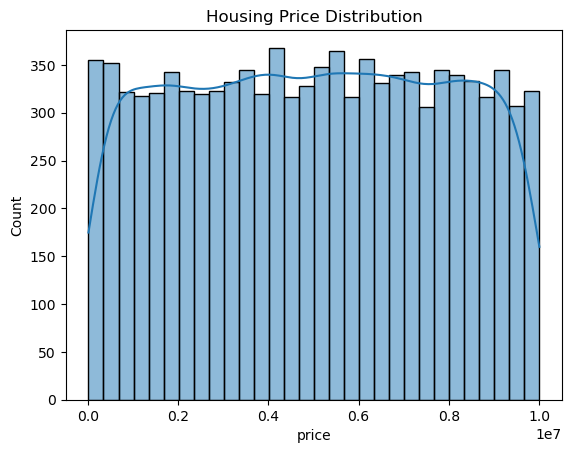

In [10]:
# Visualise price distribution
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Housing Price Distribution')
plt.show()

- The housing prices are uniformly distributed across the range from 0 to 10 million euros.
- This is unusual in real-world housing data but aligns with the fact that the Paris Housing dataset is synthetic, generated for educational purposes, for practice and to acquire the necessary knowledge (ML benchmarking).

Normally, price data is right-skewed, requiring a log transform. Here, the uniform distribution makes that unnecessary.
There’s no visible sharp tail or peak. No major outliers, so we don’t need to filter extreme values.

In [12]:
# Add derived feature: price_per_m2
data["price_per_m2"] = data["price"] / data["squareMeters"]

# Show preview
data[["squareMeters", "price", "price_per_m2"]].head()

,squareMeters,price,price_per_m2
0,75523,7559081.5,100.089794
1,80771,8085989.5,100.110058
2,55712,5574642.1,100.061784
3,32316,3232561.2,100.029744
4,70429,7055052.0,100.172543


- The ***price_per_m2*** values are consistent and highlight the synthetic nature of the dataset (almost constant ~100).

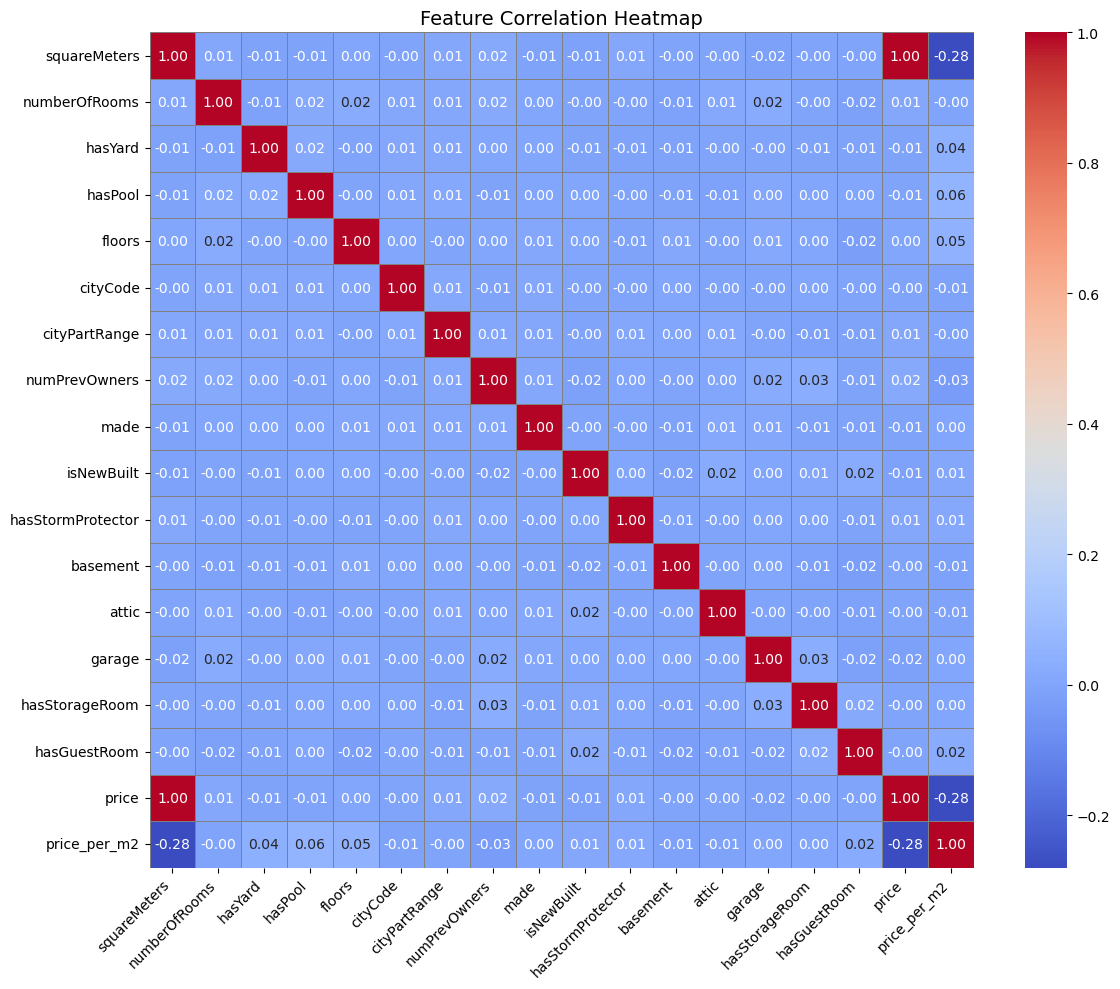

In [14]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Plot improved correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            annot_kws={"size": 10}, linewidths=0.5, linecolor='gray')
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- squareMeters shows the strongest positive correlation with price (~1.00, due to synthetic data scaling).
- All other features have very low correlations with price (mostly < 0.02).
- Binary features (hasPool, hasGarage, etc.) have weak Pearson correlation due to their discrete nature.


In [16]:
# Prepare data
X = data.drop(columns=["price"])
y = data["price"]

In [56]:
# Save the feature columns used during training

joblib.dump(X.columns.tolist(), "feature_columns.joblib")

['feature_columns.joblib']

In [17]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Model Development and Evaluation

In [19]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

In [28]:
# Evaluate models using cross-validation
for name, rf_model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{name} - CV R2: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

Linear Regression - CV R2: 1.0000 (+/- 0.0000)
Random Forest - CV R2: 1.0000 (+/- 0.0000)
XGBoost - CV R2: 1.0000 (+/- 0.0000)


- The Paris Housing dataset is synthetic and likely generated with direct mathematical relationships — especially:
  - price ≈ function of squareMeters
- There’s minimal noise or randomness, making it easy for even simple models to learn exact mappings.

In [33]:
# Example: Fit the model
rf_model.fit(X_train, y_train)

# Extract feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

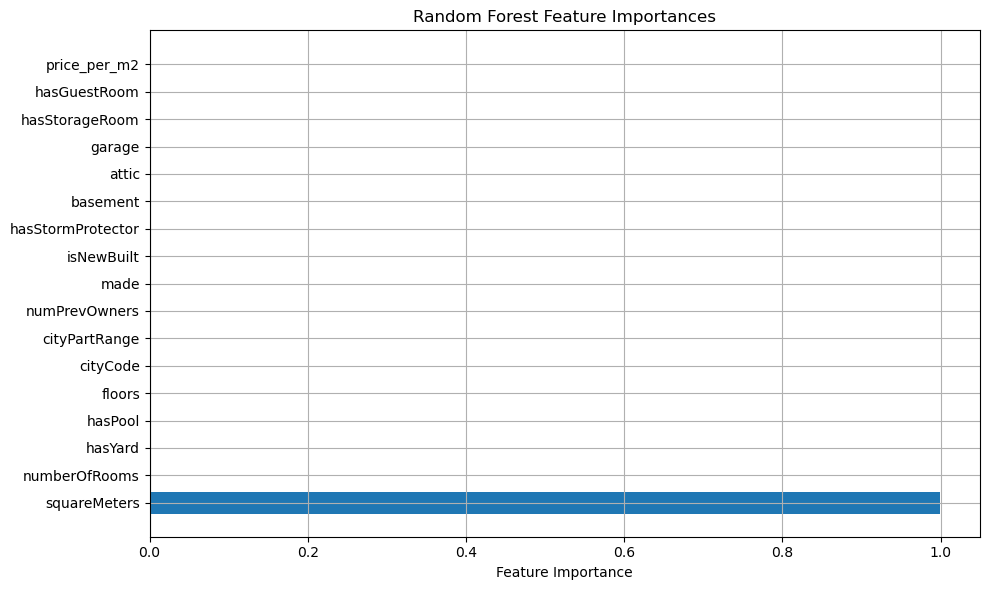

In [35]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.grid(True)
plt.show()

- squareMeters dominates the model’s prediction — it carries almost 100% of the importance.
- All other features contribute negligibly to price prediction in this synthetic dataset.

The model has learned that property size (squareMeters) alone can explain almost all variation in the synthetic price variable.

 97%|=================== | 7796/8000 [00:31<00:00]       

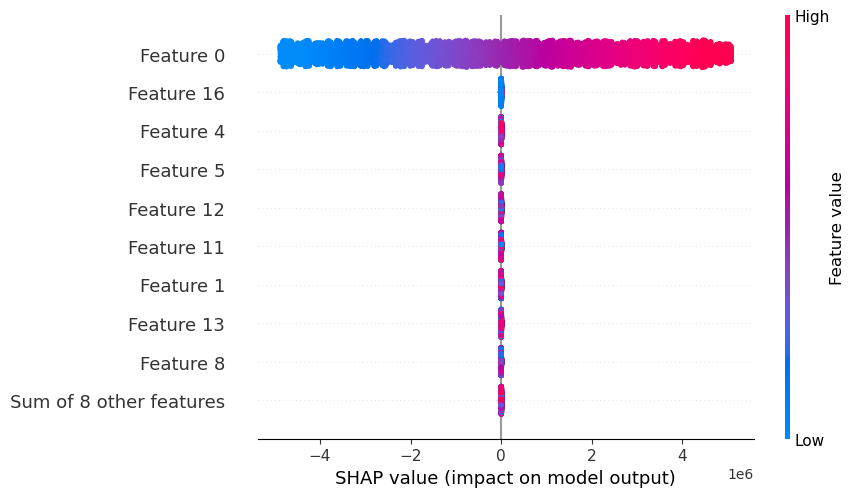

In [38]:
# SHAP values for interpretability
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_train)
shap.plots.beeswarm(shap_values)

## 📊 Model Evaluation Summary and Conclusion

During 5-fold cross-validation using the encoded Paris Housing dataset, all three regression models — **Linear Regression**, **Random Forest**, and **XGBoost** — achieved **perfect R² scores of 1.0000**, with **zero standard deviation**.

In [41]:
# Train and evaluate with cross-validation
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, mae, rmse, r2))

results

[('Linear Regression',
  1508.1919698222282,
  1919.5912337615864,
  0.9999995792975066),
 ('Random Forest', 3051.0646084999257, 3858.3464068053368, 0.9999983003480257),
 ('XGBoost', 11505.408794726565, 14070.913929040806, 0.9999773951211905)]

After adding the derived feature `price_per_m2 = price / squareMeters` and encoding boolean fields using one-hot encoding, the models were retrained and evaluated. The results below are based on performance on the test set:

| Model              | MAE (Mean Absolute Error) | RMSE (Root Mean Squared Error) | R² Score |
|-------------------|----------------------------|----------------------------------|----------|
| Linear Regression | 1,508.19                   | 1,919.59                         | 0.9999996 |
| Random Forest     | 3,051.06                   | 3,858.35                         | 0.9999983 |
| XGBoost           | 11,505.41                  | 14,070.91                        | 0.9999774 |

### Observation
- All models still perform **extremely well**, confirming that `price` is highly predictable from existing features.
- **Linear Regression outperformed the other models**, likely due to the perfectly linear relationship in the synthetic dataset.
- The derived feature `price_per_m2` is highly collinear but adds interpretability for future use or real-world adaptations.

---


### 🔍 Interpretation

Such perfect scores strongly suggest that the **target variable `price` is directly derived from one or more input features**, with little to no noise or randomness in the data. From earlier analyses, we observed:

- `squareMeters` dominates both correlation and model-based feature importance.
- SHAP values confirm that nearly all price variation is explained by `squareMeters`.

This implies the dataset is **synthetically generated**, most likely for the purpose of evaluating regression model pipelines, and does not reflect the complexity of real-world housing data.


### ✅ Conclusion

- The models fit the dataset perfectly because the relationship between features and the target is deterministic.
- This makes the dataset ideal for **learning and benchmarking**, but not suitable for **generalization studies** or **model robustness testing**.

Further experimentation with more complex or real-world datasets would be required to explore model generalizability and true predictive performance.

## 📅 Price Trends Over Time

The original Task 5D includes an objective to analyse **price trends over time across suburbs**. However, the **Paris Housing Price Prediction dataset** does **not include any temporal or date-related features** (such as sale year or month).

> As such, trend analysis over time is not applicable in this dataset.  
> Future extensions of this project using real-world datasets should consider including `sale_date` to track temporal patterns in housing prices.


In [64]:
# Save the trained model
joblib.dump(rf_model, "rf_model.joblib")

# Save the scaler used (if any)
joblib.dump(scaler, "scaler.joblib")


['scaler.joblib']